<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Resub-DS-assignments-1-3/blob/main/Association%20rule(Books).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [53]:
path = r"/content/book.csv"

In [54]:
df = pd.read_csv(path)

In [55]:
df[df.columns[1:]] = df[df.columns[1:]].astype(bool)

Support=0.1, Confidence=0.5, Min Length=2: Number of Rules=28


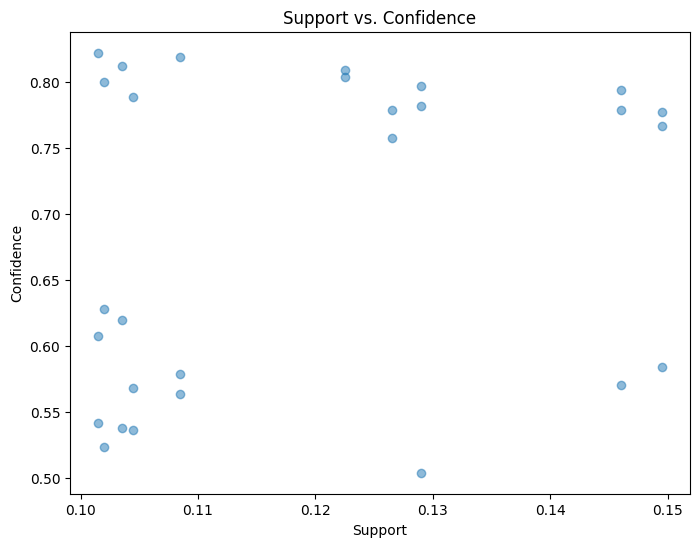

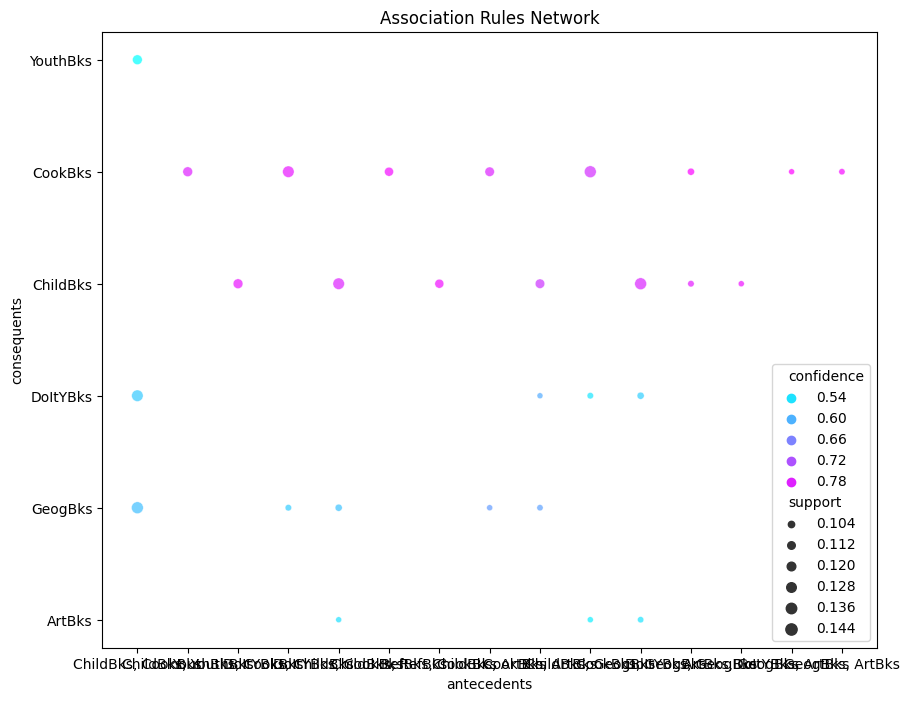

Best Rules:
Rule #17:
Antecedents: ChildBks, CookBks
Consequents: YouthBks
Support: 0.129
Confidence: 0.50390625
Lift: 2.0359848484848486

Rule #18:
Antecedents: ChildBks, YouthBks
Consequents: CookBks
Support: 0.129
Confidence: 0.7818181818181819
Lift: 1.8139632988820924

Rule #19:
Antecedents: YouthBks, CookBks
Consequents: ChildBks
Support: 0.129
Confidence: 0.7962962962962963
Lift: 1.8824971543647666

Rule #21:
Antecedents: DoItYBks, ChildBks
Consequents: CookBks
Support: 0.146
Confidence: 0.7934782608695652
Lift: 1.8410168465651164

Rule #22:
Antecedents: DoItYBks, CookBks
Consequents: ChildBks
Support: 0.146
Confidence: 0.7786666666666666
Lift: 1.8408195429472025

Rule #23:
Antecedents: ChildBks, CookBks
Consequents: DoItYBks
Support: 0.146
Confidence: 0.5703125
Lift: 2.0223847517730498

Rule #25:
Antecedents: ChildBks, RefBks
Consequents: CookBks
Support: 0.1225
Confidence: 0.8085808580858086
Lift: 1.8760576753731057

Rule #26:
Antecedents: RefBks, CookBks
Consequents: ChildBks


In [56]:
# Set the list of support, confidence, and minimum length values to try
support_values = [0.1, 0.2, 0.3]
confidence_values = [0.5, 0.6, 0.7]
min_length_values = [2, 3, 4]

# Variables to store the best parameter set
best_support = 0
best_confidence = 0
best_min_length = 0
max_num_rules = 0

for support in support_values:
    for confidence in confidence_values:
        for min_length in min_length_values:
            # Apply Apriori algorithm to mine frequent itemsets
            frequent_itemsets = apriori(df, min_support=support, use_colnames=True)

            # Generate association rules
            rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)

            # Filter out rules based on the minimum length
            rules = rules[rules['antecedents'].apply(lambda x: len(x) >= min_length)]

            # Print the number of rules for each support, confidence, and minimum length combination
            num_rules = len(rules)
            print(f"Support={support}, Confidence={confidence}, Min Length={min_length}: Number of Rules={num_rules}")

            # Store the best parameter set
            if num_rules > max_num_rules:
                best_support = support
                best_confidence = confidence
                best_min_length = min_length
                max_num_rules = num_rules

            # Visualization 1: Scatter plot of support vs. confidence
            if support == best_support and confidence == best_confidence and min_length == best_min_length:
                plt.figure(figsize=(8, 6))
                plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
                plt.xlabel('Support')
                plt.ylabel('Confidence')
                plt.title('Support vs. Confidence')
                plt.show()

            # Visualization 2: Network plot of the association rules
            if support == best_support and confidence == best_confidence and min_length == best_min_length:
                if not rules.empty:
                    rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
                    rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

                    plt.figure(figsize=(10, 8))
                    sns.scatterplot(x="antecedents", y="consequents", data=rules, size="support", hue="confidence",
                                    palette="cool", alpha=0.7)
                    plt.title('Association Rules Network')
                    plt.show()

            # Print the rules if they are not empty
            if not rules.empty:
                print("Best Rules:")
                for idx, row in rules.iterrows():
                    print(f"Rule #{idx+1}:")
                    print(f"Antecedents: {row['antecedents']}")
                    print(f"Consequents: {row['consequents']}")
                    print(f"Support: {row['support']}")
                    print(f"Confidence: {row['confidence']}")
                    print(f"Lift: {row['lift']}")
                    print()
            else:
                print("No rules found")

print(f"\nBest Parameter Set: Support={best_support}, Confidence={best_confidence}, Min Length={best_min_length}")
